<a href="https://colab.research.google.com/github/mskmei/FINAL-PROJECT-CV-2022Spring/blob/main/Semantic%20Segamentation/deeplabv3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction
This ipynb will use Deeplabv3 to perform frame-by-frame semantic segmentation of the video, and finally output the video again. In theory it can handle all videos saved on Google Drive and shared.

If you want to see the result video we got, just open this ipynb file on colab. You are allowed to view it in this notebook.

# Preparation
First of all, let's use "git clone" to get the code needed for the experiment. The code is in my personal github repo, which is mainly forked and modified from "https://github.com/VainF/DeepLabV3Plus-Pytorch.git". 

The code only offer us model, so we need to write our own function to deal with the video.

In [ ]:
!git clone https://github.com/mskmei/DeepLabV3Plus-Pytorch.git

Cloning into 'DeepLabV3Plus-Pytorch'...
remote: Enumerating objects: 665, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 665 (delta 4), reused 7 (delta 4), pack-reused 656
Receiving objects: 100% (665/665), 8.24 MiB | 21.80 MiB/s, done.
Resolving deltas: 100% (361/361), done.


Install the package we need. "kora" is used to display the video on colab. To use kora you may need a Google account. 

If you don't need to display the video online, **just ignore it** since it has nothing to do with video generation.

In [ ]:
%cd /content/DeepLabV3Plus-Pytorch
!pip install -r requirements.txt
!pip install -U kora
import network
import torch
from kora.drive import upload_public
import os
import shutil
import cv2

/content/DeepLabV3Plus-Pytorch
     |████████████████████████████████| 676 kB 5.2 MB/s 
     |████████████████████████████████| 54 kB 2.7 MB/s 
  Created wheel for visdom: filename=visdom-0.1.8.9-py3-none-any.whl size=655250 sha256=37b08080361d64b97242a4a8cbd48f1727b2eb8bf3460dd2953437f38a0c3d0b
  Stored in directory: /root/.cache/pip/wheels/2d/d1/9b/cde923274eac9cbb6ff0d8c7c72fe30a3da9095a38fd50bbf1
  Created wheel for torchfile: filename=torchfile-0.1.0-py3-none-any.whl size=5709 sha256=1398e21edd80670cba896683ed0acb62beb2ac27976c57479c351821c1d62c0b
  Stored in directory: /root/.cache/pip/wheels/ac/5c/3a/a80e1c65880945c71fd833408cd1e9a8cb7e2f8f37620bb75b
Successfully built visdom torchfile
     |████████████████████████████████| 57 kB 2.7 MB/s 
     |████████████████████████████████| 59 kB 6.4 MB/s 
Backbone HRNet Pretrained weights at: ./checkpoints/hrnetv2_32_model_best_epoch96.pth, only usable for HRNetv2-32


Import backbone as mobilenetv2

In [ ]:
model = network.modeling.__dict__["deeplabv3plus_mobilenet"](num_classes=19, output_stride=8)

Downloading: "https://download.pytorch.org/models/mobilenet_v2-b0353104.pth" to /root/.cache/torch/hub/checkpoints/mobilenet_v2-b0353104.pth


  0%|          | 0.00/13.6M [00:00<?, ?B/s]

Download video and pretrained weights from Google Drive.

In [ ]:
import gdown
gdown.download('https://drive.google.com/uc?id=1kx3J8dYsMFggJBKlFWBUie5j3kZ397_k', 'road.mp4', quiet=False)
gdown.download('https://drive.google.com/uc?id=1XlP8CzbkVkv8UZ2f6_0wtCT8P0Pu4nmD', 'weights.pth', quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1kx3J8dYsMFggJBKlFWBUie5j3kZ397_k
To: /content/DeepLabV3Plus-Pytorch/road.mp4
100%|██████████| 11.4M/11.4M [00:00<00:00, 118MB/s]
Downloading...
From: https://drive.google.com/uc?id=1XlP8CzbkVkv8UZ2f6_0wtCT8P0Pu4nmD
To: /content/DeepLabV3Plus-Pytorch/weights.pth
100%|██████████| 42.1M/42.1M [00:00<00:00, 58.6MB/s]


'weights.pth'

In [ ]:
 
def video_2_images(video_file= './road.mp4',   # declare the target video
                   image_dir='./images/', 
                   image_file='%s.jpg'):  
 
    # Initial setting
    i = 0
    interval = 3
    length = 600  # the max of frames
    
    cap = cv2.VideoCapture(video_file)
    while(cap.isOpened()):
        flag, frame = cap.read()  
        if flag == False:  
                break
        if i == length*interval:
                break
        if i % interval == 0: 
           cv2.imwrite(image_dir+image_file % str(int(i/interval)).zfill(6), frame)
        i += 1 
    cap.release()  

# images folder reset
if os.path.isdir('images'):
    shutil.rmtree('images')
os.makedirs('images', exist_ok=True)

video_2_images()

In [ ]:
model.load_state_dict(torch.load('/content/DeepLabV3Plus-Pytorch/weights.pth')['model_state'])

<All keys matched successfully>

# Test
Execute python file predict.py to perform semantic segmantation on images we got from the video .You can change the output directory by using "--save_val_results_to".We provide weights pretrained on Cityscapes dataset, and the weights file have been download through "gdown" function.

In [ ]:
!python predict.py --inp /content/DeepLabV3Plus-Pytorch/images/ --dataset cityscapes --model deeplabv3plus_mobilenet --ckpt /content/DeepLabV3Plus-Pytorch/weights.pth --save_val_results_to test_results

Backbone HRNet Pretrained weights at: ./checkpoints/hrnetv2_32_model_best_epoch96.pth, only usable for HRNetv2-32
Device: cuda
Resume model from /content/DeepLabV3Plus-Pytorch/weights.pth
100% 254/254 [05:42<00:00,  1.35s/it]


# Video Processing
We now got the output result of the semantic segmentation, which are supposed to be a series of images. But that doesn't fit our target.

We are going to:


1.   Re-output a video with the same duration as the original video through the images of the semantic segmentation result.
2.   Re-output another video with blended images.
3.   display the videos(can only be viewed on colab).


In [ ]:
%cd /content/DeepLabV3Plus-Pytorch
if os.path.exists('./output_deep.mp4'):
   os.remove('./output_deep.mp4')
!ffmpeg -r 10 -i /content/DeepLabV3Plus-Pytorch/test_results/%06d.png -vcodec libx264 -pix_fmt yuv420p output_deep.mp4


%cd /content/DeepLabV3Plus-Pytorch
if os.path.exists('./output_mix_deep.mp4'):
   os.remove('./output_mix_deep.mp4')
!ffmpeg -r 10 -i /content/DeepLabV3Plus-Pytorch/mix_results/%06d.png -vcodec libx264 -pix_fmt yuv420p output_mix_deep.mp4

/content/DeepLabV3Plus-Pytorch
ffmpeg version 3.4.8-0ubuntu0.2 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.5.0-3ubuntu1~18.04)
  configuration: --prefix=/usr --extra-version=0ubuntu0.2 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx265 --enable-libxml

Output example pictures.

In [ ]:
from PIL import Image
img1=Image.open("/content/DeepLabV3Plus-Pytorch/test_results/000000.png").convert('RGB')
img2=Image.open("/content/DeepLabV3Plus-Pytorch/mix_results/000000.png").convert('RGB')

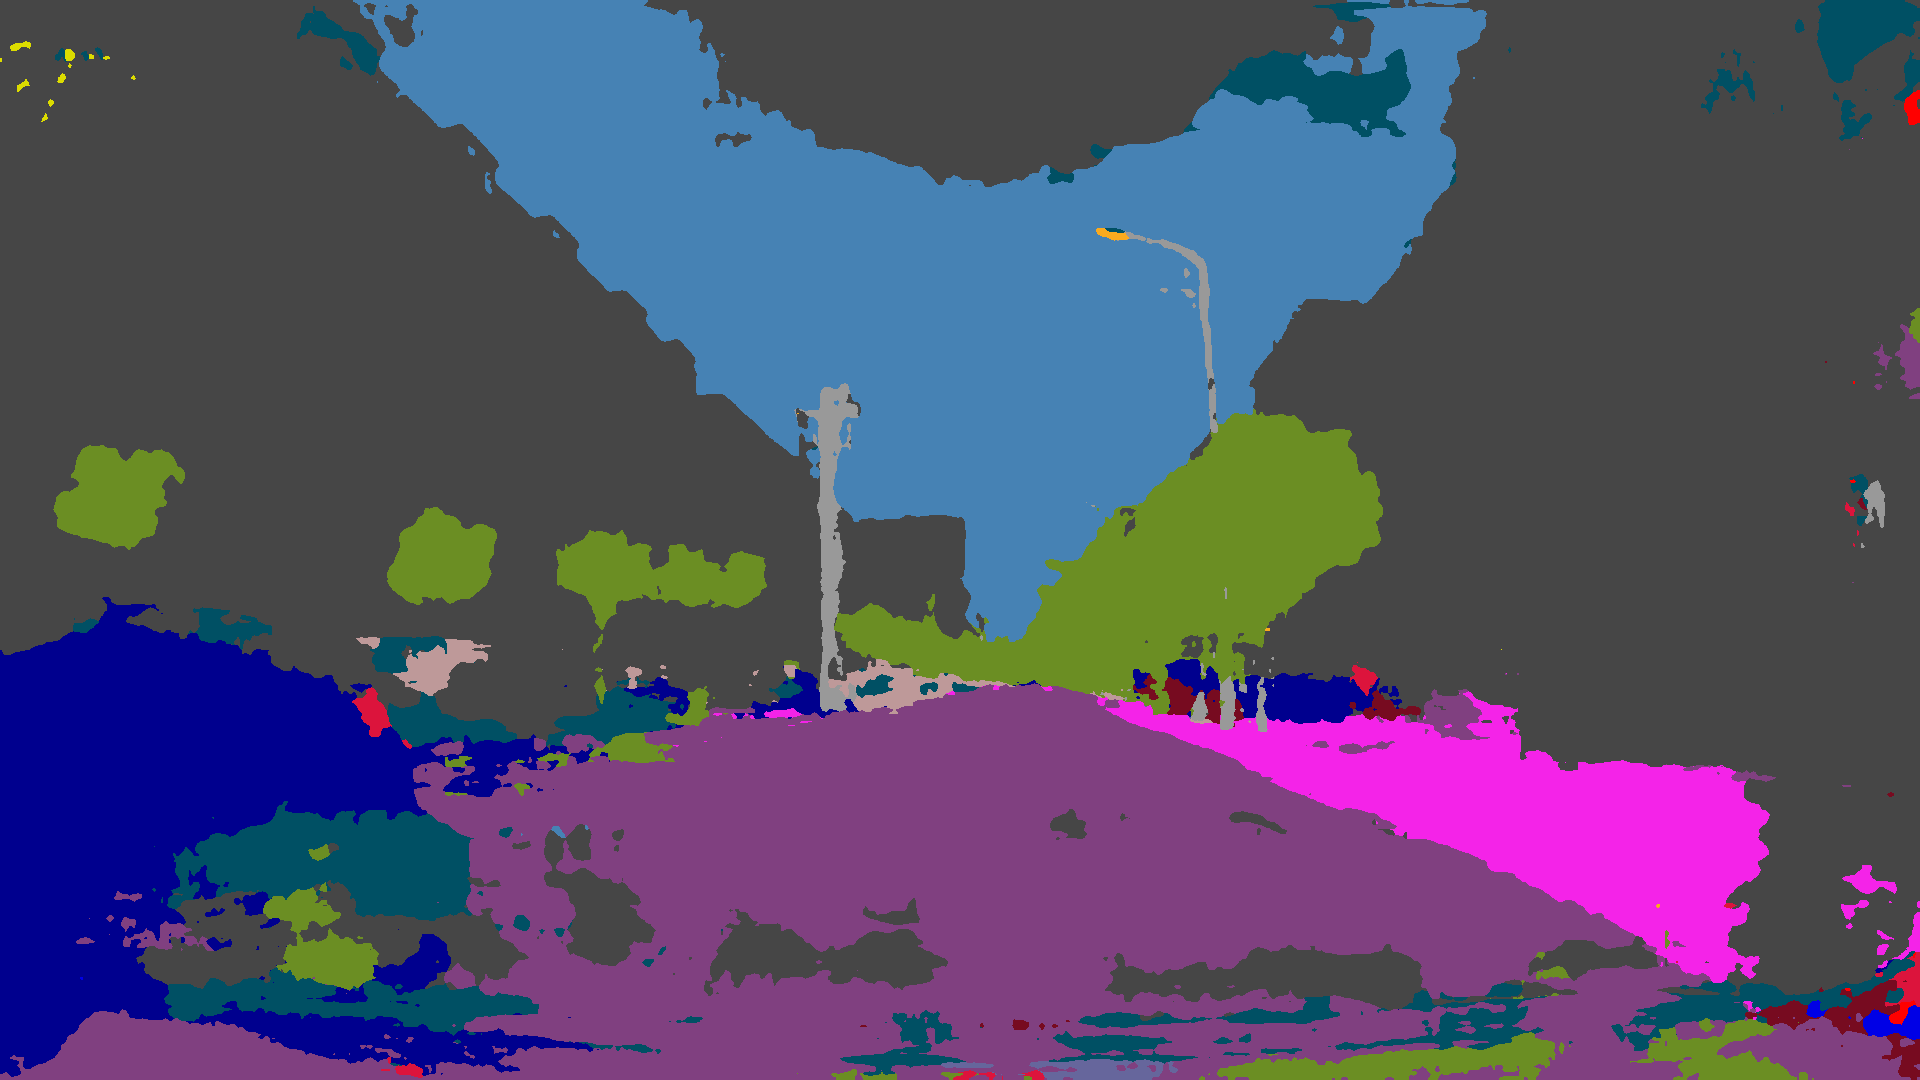

In [ ]:
img1

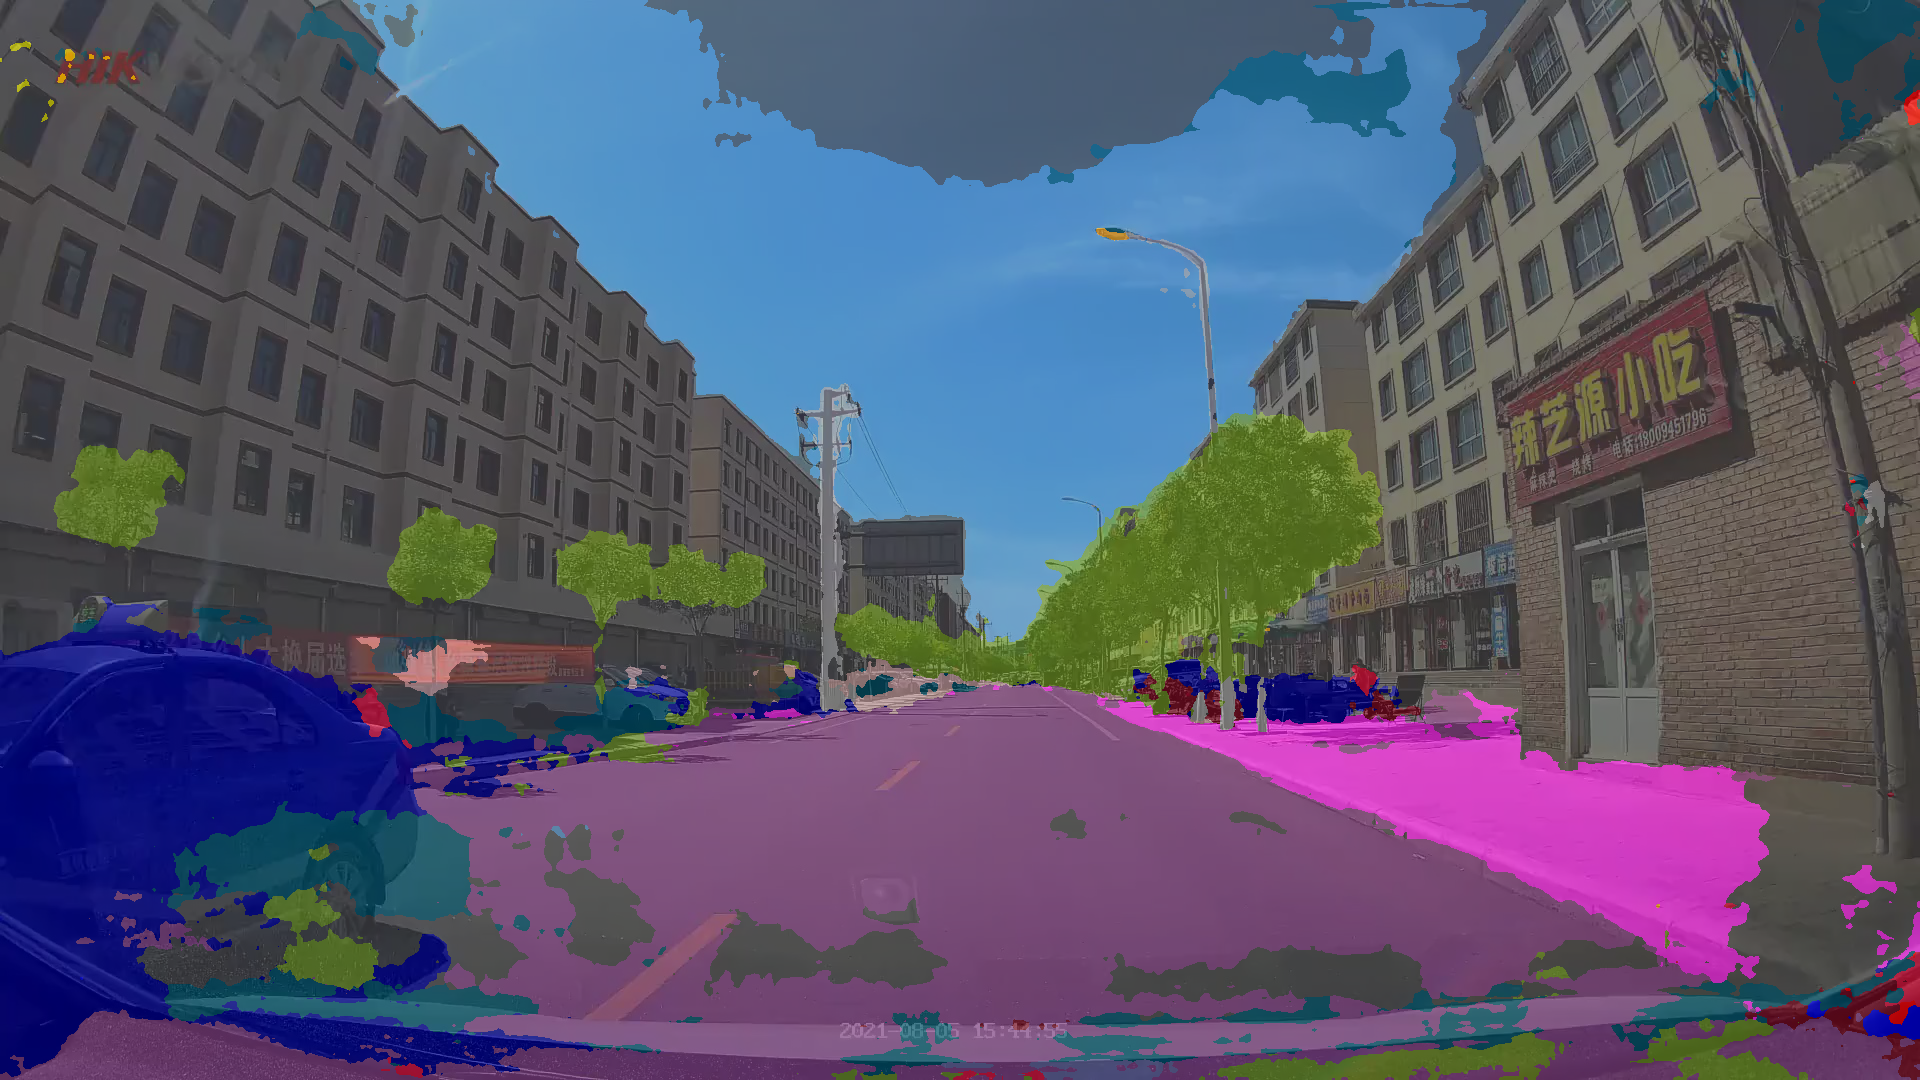

In [ ]:
img2

# Video Display
Open this file on colab or you can choose to see the video in the directory:

https://drive.google.com/drive/folders/1pVmLX6EhfBikLpH_pUjXWYzlMmM7s8Ny?usp=sharing

In [ ]:
url = upload_public('output_deep.mp4')
# then display it
from IPython.display import HTML
HTML(f"""<video src={url} width=600 controls/>""")

In [ ]:
url = upload_public('output_mix_deep.mp4')
# then display it
from IPython.display import HTML
HTML(f"""<video src={url} width=600 controls/>""")